<a href="https://colab.research.google.com/github/nhwhite212/DealingwithDataSpring2021/blob/colab/8-Visualization/A-Matplotlib_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting and Visualization

There are a handful of third-party Python packages that are suitable for creating scientific plots and visualizations (to name a few: matplotlib, Chaco, PyX, Bokeh, and others)

Here, we will focus exclusively on **matplotlib**. It is currently the most robust and feature-rich package available.

Furthermore, to build on what we have learned and simplify the generation of plots, we will put extra emphasis on plotting available within pandas.



### Visual representation of data

We require plots, charts and other statistical graphics for the written communication of quantitative ideas.

They allow us to more easily convey relationships and reveal deviations from patterns.

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

## Matplotlib

We typically import matplotlib with the following convention:



In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt

Let's add the usual libraries

In [62]:
import pandas as pd
import numpy as np

And we create some random data to plot:

In [63]:
xvalues = np.random.normal(size=1000)
yvalues = np.random.normal(size=1000)

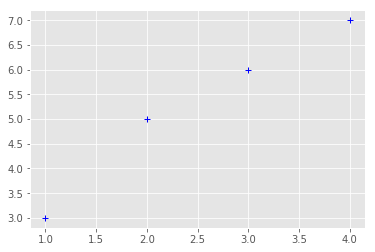

In [64]:
plt.plot([1 ,2 ,3 ,4], [3, 5, 6, 7], 'b+')

The above plot simply shows two sets of random numbers taken from a normal distribution plotted against one another. The `'ro'` argument is a shorthand argument telling matplotlib that I wanted the points represented as red circles (see our earlier short tutorial with our discussion of Python libraries).

#### Multiple plots superimposed

We can also plot many plots on top of each other:

In [65]:
# evenly sampled values between 0 and 5, at 0.2 intervals
t = np.arange(0., 5., 0.1)

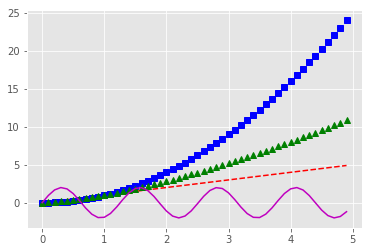

In [66]:
# red dashes, blue squares, green triangles, magenta line
import math

plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**1.5, 'g^')
plt.plot(t, 2*np.sin(5*t), 'm-')
plt.show()

#### Plotting styles

Matplotlib has also a set of predefined styles available:

In [67]:
print plt.style.available

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


In [68]:
#plt.style.use(u'fivethirtyeight')
#plt.plot(xvalues, yvalues, 'ro')
#plt.xlabel("Style: fivethirtyeight")
#plt.show()

In [69]:
# Set some Pandas options
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

#pd.set_option('display.mpl_style', 'default')

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (15, 5)
#plt.rc_context(rc={'font.family': 'monospace',  'font.weight': 'bold',   'font.size': 10})

We can exercise a little more control by breaking the plotting into a workflow:

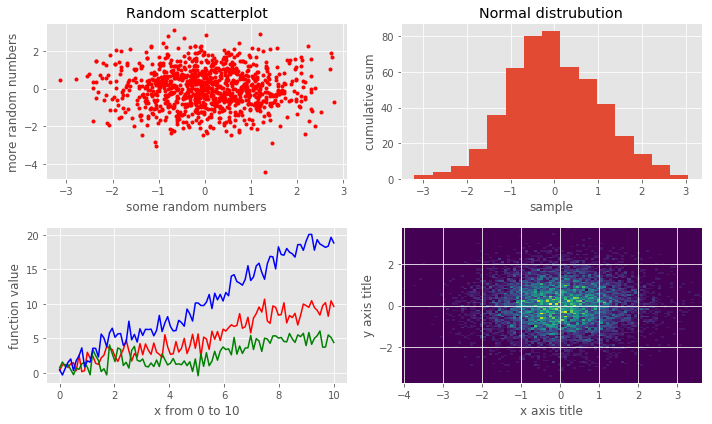

In [70]:
fig = plt.figure(figsize=(10,6))

# Create the first subfigure
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('some random numbers')
sub1.set_ylabel('more random numbers')
sub1.set_title("Random scatterplot")
sub1.plot(np.random.randn(1000), np.random.randn(1000), 'r.')

# Create the second subfigure
sub2 = fig.add_subplot(2,2,2)
sub2.hist(np.random.normal(size=500), bins=15)
sub2.set_xlabel('sample')
sub2.set_ylabel('cumulative sum')
sub2.set_title("Normal distrubution")

# Create the third subfigure
numpoints = 100
x = np.linspace(0, 10, num=numpoints)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(x, np.sin(x) + x + np.random.randn(numpoints), "r")
sub3.plot(x, np.sin(x) + 0.5 * x + np.random.randn(numpoints), "g")
sub3.plot(x, np.sin(x) + 2 * x + np.random.randn(numpoints), "b")
sub3.set_xlabel('x from 0 to 10')
sub3.set_ylabel('function value')

# Create the fourth subfigure
sub4 = fig.add_subplot(2,2,4)
x = np.random.randn(10000)
y = np.random.randn(10000)
sub4.hist2d(x,y,bins=100);
sub4.set_xlabel('x axis title')
sub4.set_ylabel('y axis title')

plt.tight_layout()
plt.savefig("normalvars.png", dpi=150)

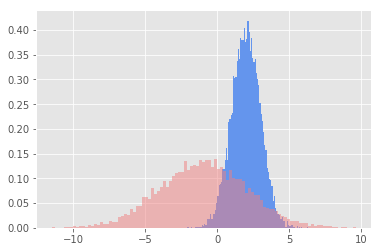

In [71]:
numpoints=10000
data1 = np.random.normal(loc=2.0, scale=1.0, size=numpoints)
data2 = np.random.normal(loc=-1.0, scale=3.0, size=numpoints)
max_data = np.r_[data1, data2].max()
# bins = np.linspace(-max_data, max_data, 10 * max_data + 1)
plt.hist(data1, bins=int(np.sqrt(numpoints))+1, normed=True, color="#6495ED", alpha=1.0)
plt.hist(data2, bins=int(np.sqrt(numpoints))+1, normed=True, color="#F08080", alpha=0.5)
plt.show()

matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

If you want to make your plots look like the plot above, you can configure the default options for matplotlib. A good idea is to "steal" the *matplotlibrc* file from [Huy Nguyen](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/) and store it under `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc`

## Plotting in Pandas

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [72]:
normals = pd.Series(np.random.normal(size=10))
normals.head()

0    0.101879
1    1.724308
2   -0.929534
3   -0.030043
4    0.772641
dtype: float64

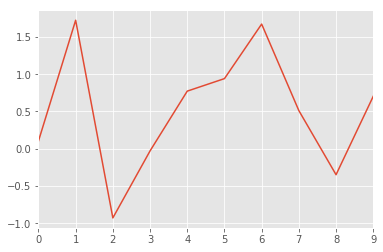

In [73]:

normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

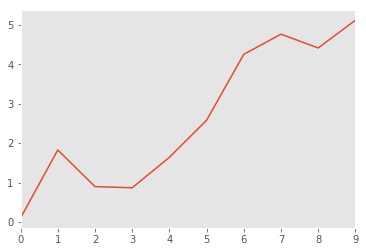

In [74]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:
We'll generate a dataframe  with 3 random series from different probability distributions

In [75]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables

,gamma,normal,poisson
0,2.631924,-0.871075,1
1,1.240541,1.336444,1
2,3.032947,0.445437,2
3,0.228489,-0.393054,1
4,0.013130,-0.602236,1
5,0.758851,1.541113,1
6,0.281827,0.021290,0
7,0.679419,-2.833521,4
8,3.669205,0.586372,1
9,1.366678,1.310396,0


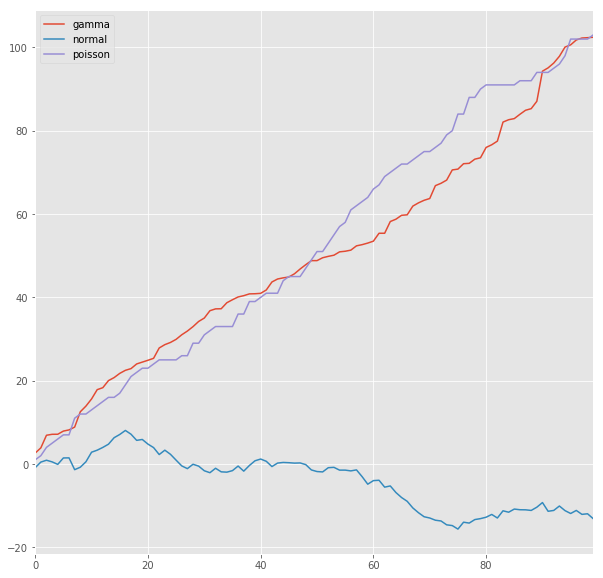

In [76]:
variables.cumsum(0).plot(figsize=(10,10))

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67c5466490>,
      dtype=object)

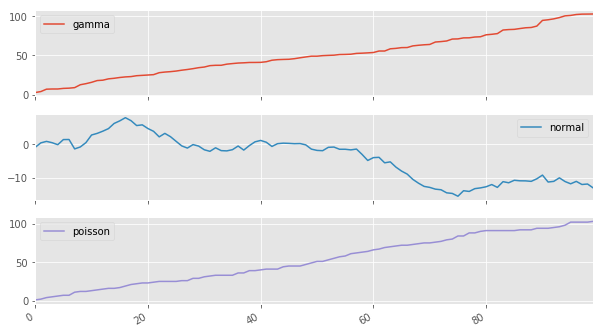

In [77]:
variables.cumsum(0).plot(subplots=True,figsize=(10,6))

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

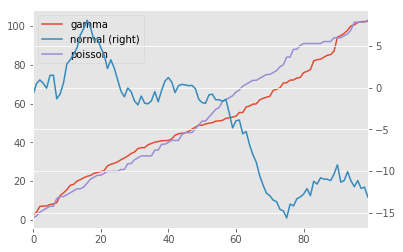

In [78]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

In [79]:
for i,var in enumerate(['normal','gamma','poisson']):
    print "i=",i
    print "var=",var

i= 0
var= normal
i= 1
var= gamma
i= 2
var= poisson


Text(0,0.5,'cumulative sum (poisson)')

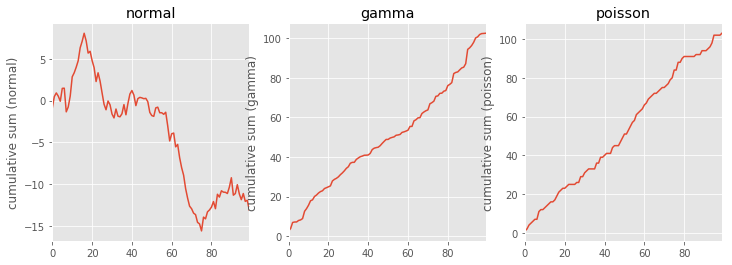

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum (normal)')
axes[1].set_ylabel('cumulative sum (gamma)')
axes[2].set_ylabel('cumulative sum (poisson)')

## One example of how to use random numbers is in evaluating the price of options
#### One of the fundamental assumptions of modern finance theory is that stock prices are independent 
#### and the period to period percent changes have a mean of 0 and are normally distributed (central limit theorem, sum of independent random variables)
#### This means that the log of the changes are normally distributed (i.e. log-normal distribution)
#### So if we want to evaluate a CALL option for a European option, we need to know the following:
1. S = Current value of the underlying asset
2. K = Strike price of the option
3. t = Life to expiration of the option
4. r = Riskless interest rate corresponding to the life of the option
5. s = Standard Deviation in the ln(value) of the underlying asset
###### We could use the Black-Scholes Model to compute the value
###### Or we could simulate many different possible price paths and what the value of the option would be for each one.

#### Lets look at that graphically...

Generate 1000 lognormal percent change series of length N with mean zero and variance s2

Apply these to the original Price S (cumulatively)

These are 1000 possible price paths of the asset

Evaluate the price of the option at every time period, with a riskless rate of r 

negative prices are set to zero

Take the average (Expected value of all the option prices)

That is the value of the option

In [188]:
# set the option variables
nsim=1000   # number of simulations
S= 102.   # Current Price
t= 5    #days to call
r=.06     # Riskless annual interest rate
sannual=.05 # annual volatility
s=sannual/252. # Daily volatility (252 trading days)


K=102.  #Strike price
# generate nsim pct price changes of length t, std s
changes= pd.DataFrame(np.random.lognormal(0.0,s, size=(t, nsim)))
dir(changes)
#print(changes)
cumchanges=changes.cumprod()
#print(cumchanges)

# Apply the cumlative changes to the log of the starting price
LogPrices= np.log(S)* cumchanges
# Determine Price nsim prices series
Prices= np.exp(LogPrices)
#Prices.plot(legend=False)
# What would S be worth if we just invested it in treasuries for t days.
riskfree= S*(1.+r/356.)**t

print("the risk free ending price is", riskfree)
# Find the prices in the ending period - the riskfree price
# note: many of these will be negative
OptionValues=Prices-riskfree

#print(OptionValues)
EndValues=OptionValues[t-1:]

print("Ending Values are:")
print(EndValues)   
# Now set all the ending values to zero if they are negative
# First convert to a list
EndValues=EndValues.values.tolist()[0]
#ignore negative prices
for i in range(nsim):
  EndValues[i] = max(EndValues[i],0.0) 
print("Endvalues positive")
print(EndValues)
# Generate 1000 lognormal percent change series of length N with mean zero and variance s2
# Apply these to the original Price S (cumulatively)
### These are 1000 possible price paths of the asset
### Evaluate the price of the option at every time period, with a riskless rate of r
#### Take the average (Expected value of all the option prices)
#### That is the value of the option)
### But will only exercise those options which are positive

OptionValue=np.average(EndValues) +S-K
if (OptionValue <0):
  OptionValue = 0.0
print("The option value for an asset whose price is ",S, "after ",t," time periods", " with a strike price of ",K, "and Vol of ",sannual," is: ",OptionValue)

('the risk free ending price is', 102.08598403467778)
Ending Values are:
        0         1         2         3         4         5         6    \
4 -0.349786 -0.063458 -0.111256 -0.144771 -0.260003  0.021753 -0.138134   

        7         8       9    ...       990      991       992       993  \
4 -0.055389 -0.104933  0.2486  ... -0.083511 -0.40535  0.465912 -0.301424   

        994      995      996       997       998       999  
4 -0.022273  0.08254 -0.49744 -0.161029 -0.007703  0.144759  

[1 rows x 1000 columns]
Endvalues positive
[0.0, 0.0, 0.0, 0.0, 0.0, 0.021752918455845816, 0.0, 0.0, 0.0, 0.2486004744970245, 0.0708686300642114, 0.0, 0.04114760137335338, 0.0, 0.0, 0.30641542306166514, 0.0, 0.24659433253549423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10028516846954005, 0.0, 0.0, 0.16297552930343784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28947862939867264, 0.0, 0.0, 0.370883943157466, 0.04550709650870033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1996246584428576, 0.0, 0.10

### How would we modify the code for an American Option that can be exercised early?

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up a dataset with the passengers from Titanic.

In [189]:
!mkdir data

In [190]:
!curl  -q http://people.stern.nyu.edu/nwhite/DealingwithDataSpring2021/titanic.csv -o data/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44230  100 44230    0     0  25581      0  0:00:01  0:00:01 --:--:-- 25566


In [191]:
titanic = pd.read_csv("data/titanic.csv", sep=",")
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


And let's run a couple of SQL-like queries on the DataFrame object that we just loaded:

In [192]:
titanic.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

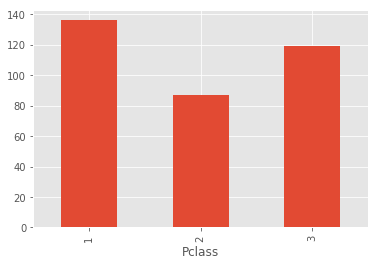

In [193]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

In [197]:
titanic.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.137026
Name: Survived, dtype: float64

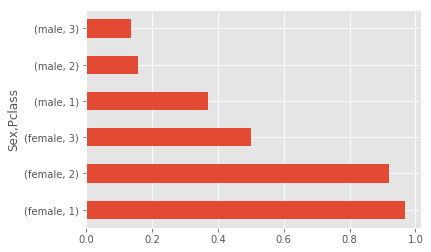

In [195]:
titanic.groupby(['Sex','Pclass']).Survived.mean().plot(kind='barh')

In [198]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      296     47

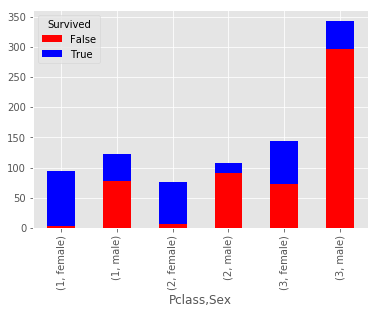

In [199]:
death_counts.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.
That gives us the percent survival rate by group.

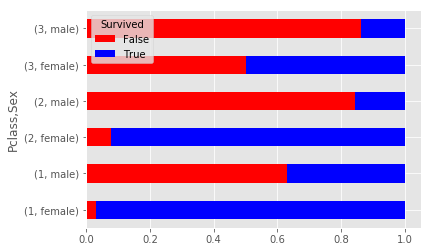

In [200]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['red','blue'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

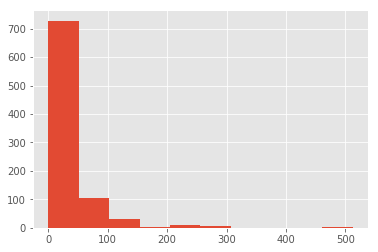

In [201]:
titanic["Fare"].hist()

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

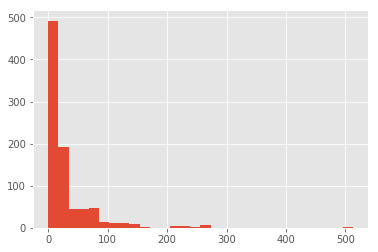

In [202]:
titanic.Fare.hist(bins=30)

There are algorithms for determining an ["optimal" number of bins](https://en.wikipedia.org/w/index.php?title=Histogram&oldid=548769683#Number_of_bins_and_width), each of which varies somehow with the number of observations in the data series. Here is the implementation for three such heuristics:

In [203]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.Fare.dropna())

(10, 29, 13)

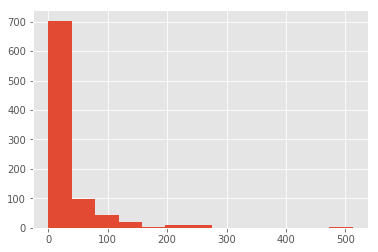

In [204]:
titanic.Fare.hist(bins=doanes(titanic.Fare.dropna()))

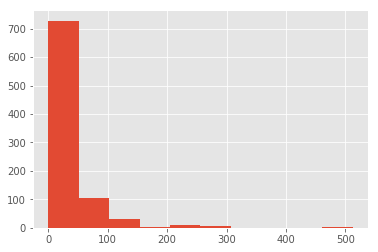

In [205]:
titanic.Fare.hist(bins=sturges(len(titanic)))

### Exercise

Create a histogram for the **ages** of the passengers

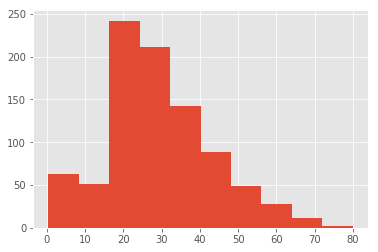

In [206]:
### your code here
titanic.Age.hist(bins=sturges(len(titanic)))

## Density plot

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

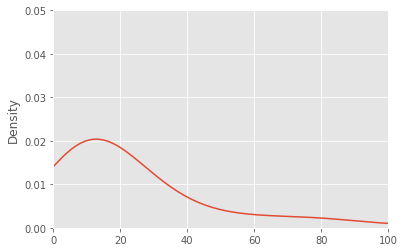

In [207]:
#df = titanic.fare.dropna()
titanic["Fare"].plot(kind='kde', xlim=(0,100), ylim=(0,0.05))

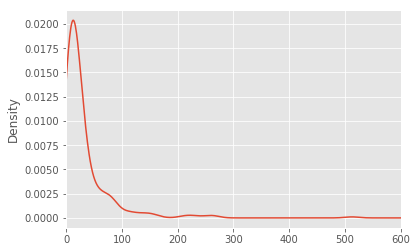

In [208]:
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

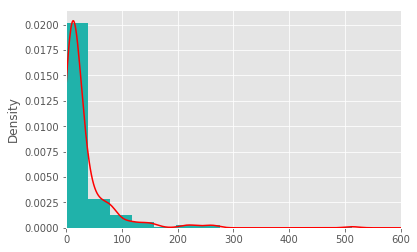

In [209]:
titanic.Fare.hist(bins=doanes(titanic.Fare.dropna()),  normed=True, color='lightseagreen')
titanic.Fare.dropna().plot(kind='kde', xlim=(0,600), style='r-')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

### Exercise

Create a density plot for the **ages** of the passengers

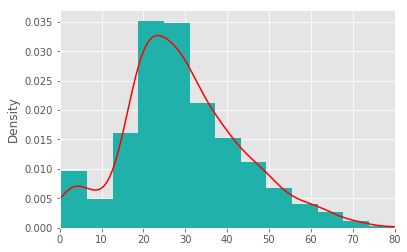

In [210]:
### your code here
titanic.Age.hist(bins=doanes(titanic.Fare.dropna()),  normed=True, color='lightseagreen')
titanic.Age.dropna().plot(kind='kde', xlim=(0,80), style='r-')

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

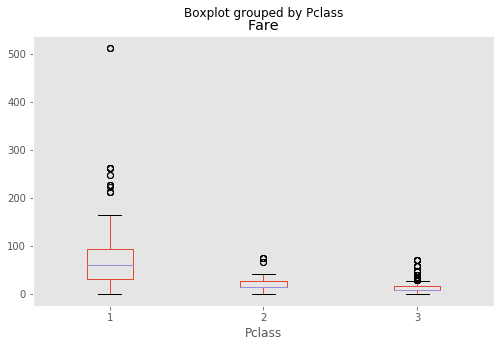

In [211]:
titanic.boxplot(column='Fare', by='Pclass', grid=False, figsize = (8,5))

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

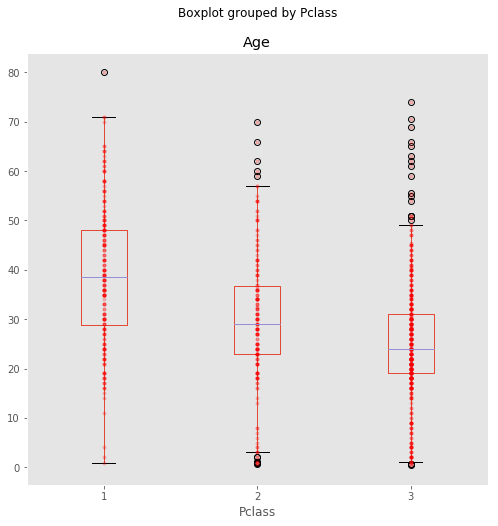

In [212]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    # The below is an idiom to create a list of len(y) size, all filled with the value i
    x = [i] * len(y)
    plt.plot(x, y, 'r.', alpha=0.2)

Now, you will notice something unfortunate: We have all the points stacked on top of each other. For this reason, we introduce the notion of **jitter** (i.e., small amount of noise) to allow the data points to be visible: We are going to randomly move the X -axis (Pclass) a little on each point.

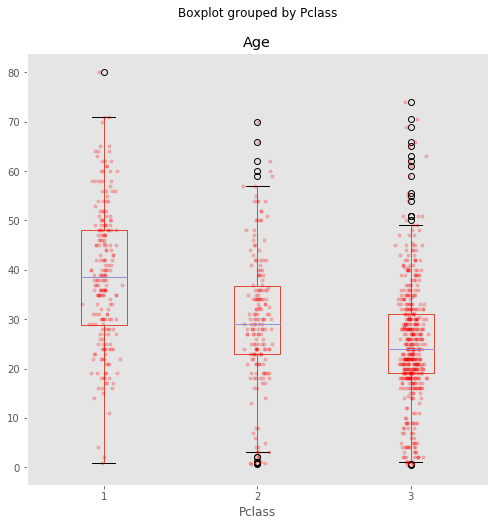

In [214]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

### Some tips:
When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

A related but inferior cousin of the box plot is the so-called dynamite plot, which is just a bar chart with half of an error bar, unfortunately popularized through Excel:

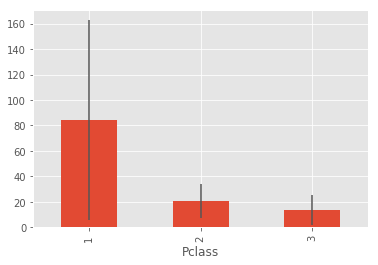

In [215]:
titanic.groupby('Pclass')['Fare'].mean().plot(kind='bar', yerr=titanic.groupby('Pclass')['Fare'].std())

#### Why is this plot a poor choice?

- bar charts should be used for measurable quantities (*e.g.* raw data), not estimates. The area of the bar does not represent anything, since these are estimates derived from the data.
- the "data-ink ratio" (*sensu* Edward Tufte) is very high. There are only 6 values represented here (3 means and 3 standard deviations).
- the plot hides the underlying data.

A boxplot is **always** a better choice than a dynamite plot.

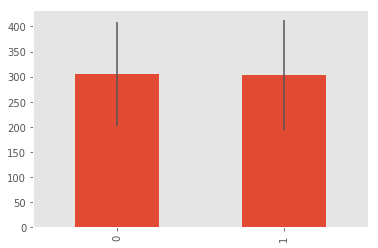

In [216]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

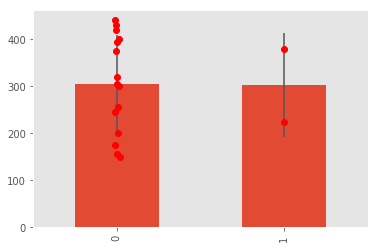

In [217]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

## Scatterplots

To look at how Pandas does scatterplots, let's load the [baseball sample dataset](https://raw.githubusercontent.com/pydata/pandas/master/doc/data/baseball.csv).

In [218]:
!curl http://people.stern.nyu.edu/nwhite/DealingwithDataSpring2021/data/baseball.csv -o data/baseball.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8767  100  8767    0     0  38964      0 --:--:-- --:--:-- --:--:-- 38964


In [219]:


baseball = pd.read_csv("./data/baseball.csv")
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. 

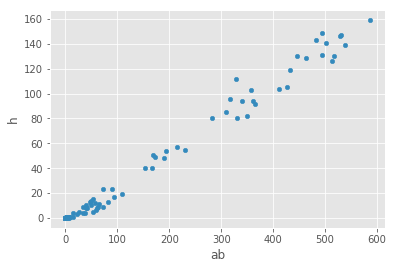

In [220]:
fig = baseball.plot(kind='scatter', x='ab', y='h')

Let's put some limits on the x and y axis:

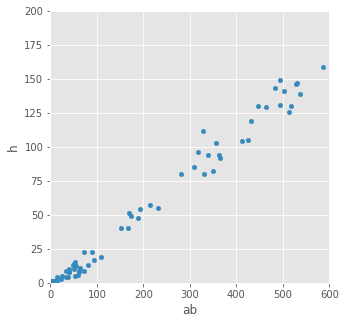

In [221]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200], figsize=(5,5))

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

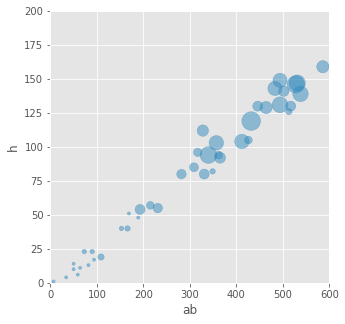

In [223]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200],  figsize=(5,5), s=baseball.hr*10, alpha=0.5)

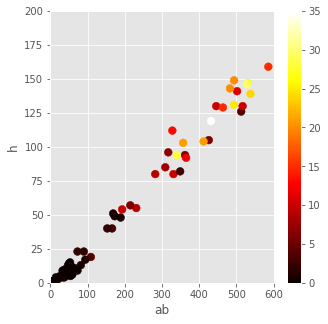

In [224]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200], 
                    figsize=(5,5), c=baseball.hr, s=60, cmap='hot')

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function. It generates a matrix of pair-wise scatterplots, optionally with histograms or kernel density estimates on the diagonal.

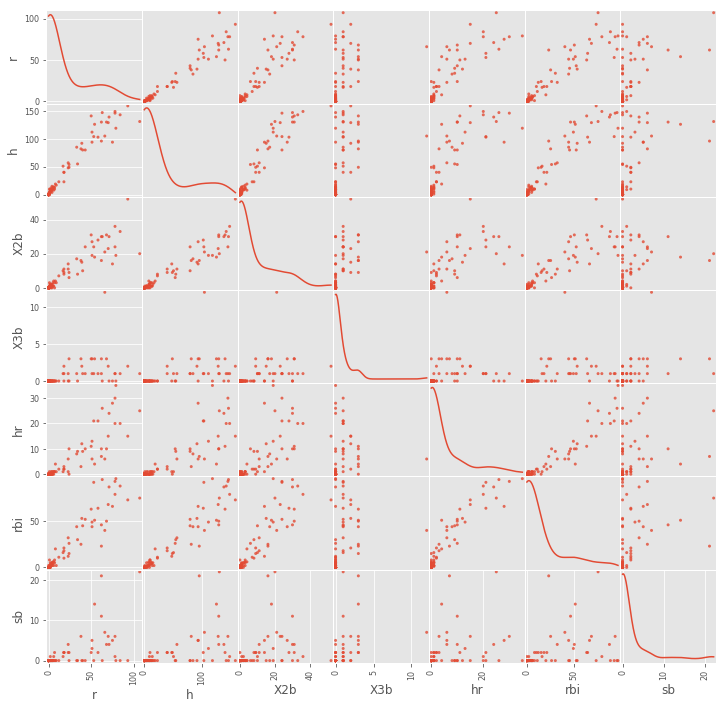

In [225]:


fig = pd.plotting.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,12), diagonal='kde', alpha=0.8)

## Hexagonal Bin Plot

The hexagonal is useful when we have a very large number of points to display, and even the addition of jitter cannot transform a scatterplot into something readable. 

You can create hexagonal bin plots with DataFrame.plot() and kind='hexbin'. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [226]:
df = pd.DataFrame( np.random.randn(10000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(10000)


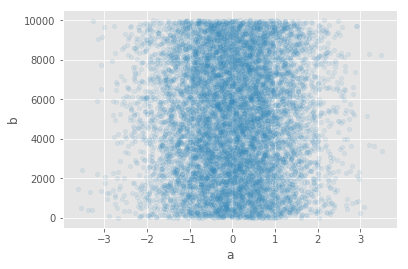

In [227]:
df.plot(kind='scatter', x='a', y='b', figsize=(6,4), alpha=0.1)

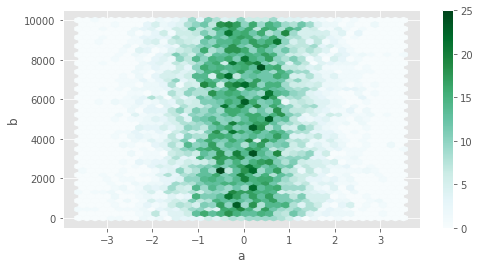

In [228]:
df.plot(kind='hexbin', x='a', y='b', gridsize=40,figsize=(8,4))

A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

### LAG PLOT
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

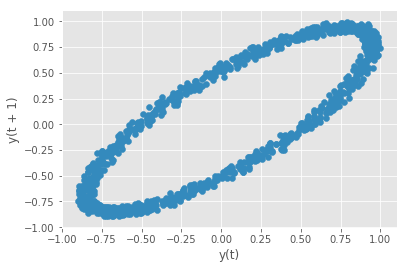

In [229]:
from pandas.plotting import lag_plot
plt.figure();
# generate a linear line around an oval (np.pi)
spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)
# generate a series  of random points that have a dependency
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))

lag_plot(data);

### Autocorrelation plot

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots

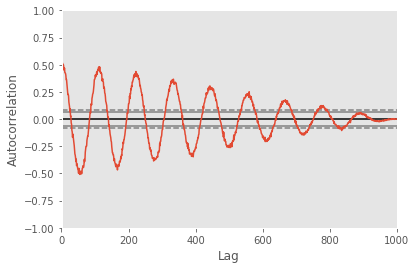

In [230]:
from pandas.plotting import autocorrelation_plot

plt.figure();

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)

data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(data);

### These examples should be helpful in your final projects in displaying your data.